# 1. Infeasible Problem

- 불가능한 문제

## obj.


$min_{x_1, x_2, x_3} (x_1 + x_2 + x_3)$


## Subject to.

$x_1 \geq 0$

$x_2 + x_3 \geq 5$

$x_3 \leq -10$


In [1]:
import gurobipy as gp
import numpy as np
from gurobipy import GRB

In [2]:
m = gp.Model('infeasible_model')

Using license file C:\Users\woals\gurobi.lic
Academic license - for non-commercial use only


In [3]:
# create variables
x1 = m.addVar(name="x1")
x2 = m.addVar(name="x2")
x3 = m.addVar(name="x3")

In [4]:
# unbounded or infeasible에서 명확한 결론을 얻기 위한 파라미터 설정
m.Params.DualReductions = 0

Changed value of parameter DualReductions to 0
   Prev: 1  Min: 0  Max: 1  Default: 1


In [5]:
m.setObjective(x1 + x2 + x3, GRB.MINIMIZE)

In [6]:
# create constraint
m.addConstr(x1 >= 0, "c1")
m.addConstr(x2 + x3 >= 5, "c2")
m.addConstr(x3 <= -10, "c3")

<gurobi.Constr *Awaiting Model Update*>

In [7]:
m.optimize()

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 3 rows, 3 columns and 4 nonzeros
Model fingerprint: 0xc92f9827
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 1e+01]
Presolve time: 0.01s

Solved in 0 iterations and 0.01 seconds
Infeasible model


In [8]:
if m.status == GRB.OPTIMAL:
    print('Optimal solution found')

elif m.status == GRB.INFEASIBLE:
    print("Optimal solution is Infeasible problem")
    
elif m.status == GRB.INF_OR_UNBD:
    print("Optimal solution is Infeasible or unbounded problem")
    
elif m.status == GRB.UNBOUNDED:
    print("Optimal solution is unbounded problem")

else:
    print('Optimal solution NOT found')

Optimal solution is Infeasible problem


# 2. Unbounded Problem

- 도달할 수 없는 문제

## obj.

$max(x_1 \times 6 x_2)$

## Subject to.

$x_1 + x_2 \geq 6$

$3 x_1 - 2 x_2 \geq -3$ 

$x_1 \geq 0$

$x_2 \geq 0$

In [9]:
m = gp.Model('unbounded_model')

In [10]:
# create variables
x1 = m.addVar(name="x1")
x2 = m.addVar(name="x2")

In [11]:
m.setObjective(x1 + 6 * x2, GRB.MAXIMIZE)

In [12]:
# create constraint
m.addConstr(x1 + x2 >= 6, "c1")
m.addConstr(3 * x1 - 2 * x2 >= -3, "c2")
m.addConstr(x1 >= 0, "c3")
m.addConstr(x2 >= 0, "c4")

<gurobi.Constr *Awaiting Model Update*>

In [13]:
# unbounded or infeasible에서 명확한 결론을 얻기 위한 파라미터 설정
m.Params.DualReductions = 0

Changed value of parameter DualReductions to 0
   Prev: 1  Min: 0  Max: 1  Default: 1


In [14]:
m.optimize()

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0xa0a3b9cb
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 6e+00]
Presolve removed 2 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.0000000e+30   0.000000e+00   7.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Unbounded model


In [15]:
if m.status == GRB.OPTIMAL:
    print('Optimal solution found')

elif m.status == GRB.INFEASIBLE:
    print("Optimal solution is Infeasible problem")
    
elif m.status == GRB.INF_OR_UNBD:
    print("Optimal solution is Infeasible or unbounded problem")
    
elif m.status == GRB.UNBOUNDED:
    print("Optimal solution is unbounded problem")

else:
    print('Optimal solution NOT found')

Optimal solution is unbounded problem


# 3. Linear Regression

In [16]:
def load_data(path):
    with open(path, 'r') as f:
        data = f.readlines()
        
    x_data = []
    y_data = []

    for d in data:
        x, y = d.strip('\n').split(',')

        x_data.append(float(x))
        y_data.append(float(y))
        
    return np.array(x_data), np.array(y_data)

In [17]:
x_data, y_data = load_data('./data/ex1data1.txt')

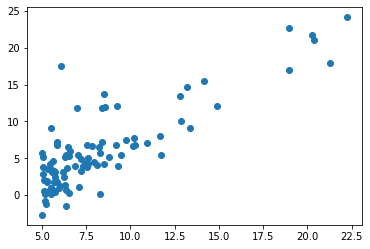

In [18]:
import matplotlib.pyplot as plt

plt.scatter(x_data, y_data)

In [19]:
x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

print(x_data.shape, y_data.shape)

(97, 1) (97, 1)


In [20]:
X = np.concatenate([np.ones_like(x_data), x_data], axis=1)
y = y_data.reshape(len(y_data), 1)

In [21]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y

In [22]:
print(f"theta 0 : {theta[0]} / theta 1 : {theta[1]}")

theta 0 : [-3.89578088] / theta 1 : [1.19303364]


In [23]:
new_x_data = range(0, 26)

pred_y = theta[1] * new_x_data + theta[0]

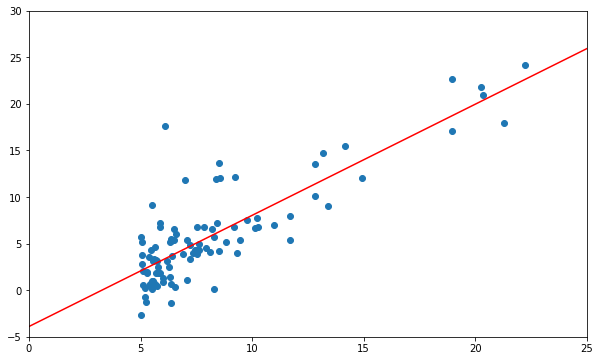

In [24]:
plt.figure(figsize=(10, 6))

plt.scatter(x_data, y_data, label="data")
plt.plot(new_x_data, pred_y, color='red')

plt.xlim(0, 25)
plt.ylim(-5, 30)

plt.show()

# Gradient Descent

In [25]:
import random

x, y = load_data('./data/ex1data1.txt')
lr = [0.1, 0.01, 0.001, 0.0001, 0.00001] 
epochs = 5000

m = len(x)

theta_1_log = []
theta_0_log = []
error_log = []

print(f"Init Epoch : {epochs}")

for _lr in lr:
    error = []
    
    theta_0 = random.random()
    theta_1 = random.random()
    
    print(f"Init Learning Rate : {_lr}")
    
    for e in range(epochs):
        pred_y = theta_1 * x + theta_0

        error.append(abs(sum(pred_y - y)))

        new_theta_1 = theta_1 - _lr * sum(x * (pred_y - y)) / m
        new_theta_0 = theta_0 - _lr * sum(pred_y - y) / m 

        theta_1 = new_theta_1
        theta_0 = new_theta_0
    
    theta_0_log.append(theta_0)
    theta_1_log.append(theta_1)
    error_log.append(error)

Init Epoch : 5000
Init Learning Rate : 0.1


C:\Users\woals\.conda\envs\alpha\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars
C:\Users\woals\.conda\envs\alpha\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


Init Learning Rate : 0.01
Init Learning Rate : 0.001
Init Learning Rate : 0.0001
Init Learning Rate : 1e-05


In [26]:
print(f"theta 0 : {theta_0_log}\ntheta 1 : {theta_1_log}")

theta 0 : [nan, -3.895269644997272, -2.0090636049221464, -0.14777204445434766, 0.6279417539632863]
theta 1 : [nan, 1.1929822852578889, 1.0034924291977978, 0.8165055028571011, 0.7397969358008242]


In [27]:
pred_y = []
new_x_data = range(0, 26)

for theta_1, theta_0 in zip(theta_1_log, theta_0_log):
    pred_y.append(theta_1 * new_x_data + theta_0)

In [28]:
color = ['red', 'blue', 'green', 'orange', 'purple']

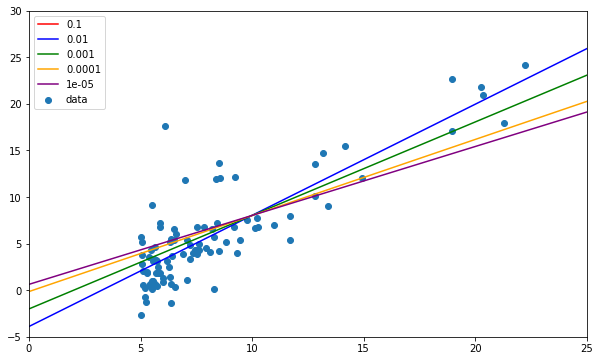

In [29]:
plt.figure(figsize=(10, 6))

plt.scatter(x_data, y_data, label="data")

for i, y in enumerate(pred_y):
    plt.plot(new_x_data, y, color=color[i], label=f"{lr[i]}")

plt.legend()
plt.xlim(0, 25)
plt.ylim(-5, 30)

plt.show()

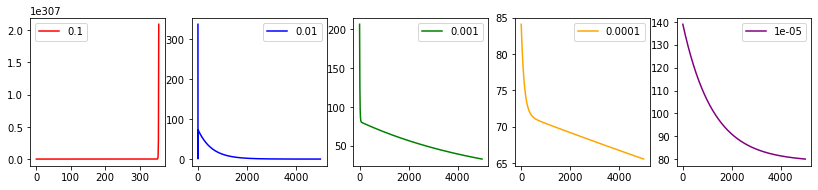

In [30]:
fig = plt.figure(figsize=(14, 6))

for i, error in enumerate(error_log):
    ax = fig.add_subplot(2,5,i+1)
    ax.plot(range(len(error)), error, color=color[i], label=f"{lr[i]}")
    ax.legend()
    
plt.show()